In [1]:


import time
import re
import pylab as pl
import numpy as np

from datetime import datetime, timedelta

import subprocess

import os
import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

from joblib import Parallel, delayed
import time
import numpy as np
import shutil


In [2]:
%config NotebookApp.iopub_data_rate_limit=10000000000

In [3]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat '+experiment+'/nohup_client_*', shell=True)
#     print(result)

    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:
#                 print(line)

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
    
#                 print(time_item)
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    
#     print(Times)

    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            
            print(next_begin_time)
            
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats


In [4]:
with open('all_local_ips','r') as firstfile:
    for line in firstfile:
        print(line)


127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [5]:
with open('all_local_ips','r') as firstfile, open('all_external_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:
        print(line)

        secondfile.write(line)
        
        
with open('all_local_ips','r') as firstfile, open('all_internal_ips','w') as secondfile:
      
    # read content from first file
    for line in firstfile:

        secondfile.write(line)

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1

127.0.0.1


In [6]:
import subprocess

In [7]:
nclients = 1
nnodes = 4

In [8]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

In [9]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

In [10]:
data2, len(data2)

(['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1'], 5)

In [11]:
data = []

In [12]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [13]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [14]:
with open('replicas.txt', 'w') as f:
    for line in data[:nnodes]:
        f.write("%s\n" % line)

In [15]:
data, len(data)

(['127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1',
  '127.0.0.1    127.0.0.1'],
 5)

In [16]:
nclients

1

In [17]:
with open('clients.txt', 'w') as f:
    for line in data[nnodes:]:
        f.write("127.0.0.1\n")       

In [18]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines


['127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1', '127.0.0.1']

In [19]:
len(lines)

5

In [20]:
experiment = '../temp'

In [21]:
os.system('cd ../temp; echo 3108 | sudo -S  rm *')

[sudo] password for tejas: 

0

In [22]:
node_list = list(range(len(lines)))

node_list_server = node_list[:nnodes]
node_list_client = node_list[-nclients:]

node_list_server, node_list_client


([0, 1, 2, 3], [4])

In [23]:
nnodes

4

In [24]:
os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall hotstuff-client')
os.system('echo 3108 | sudo -S killall nohup')


[sudo] password for tejas: hotstuff-app: no process found
[sudo] password for tejas: hotstuff-client: no process found
[sudo] password for tejas: nohup: no process found


256

In [25]:
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




Name of TestRun: ../temp
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.13", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.13")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /home/tejas/work/O2PRBC
[ 21%] Built target libsecp256k1
[ 24%] Building CXX object CMakeFiles/hotstuff.dir/src/consensus.cpp.o
[ 48%] Built target salticidae
[ 51%] Built target salticidae_shared
[ 54%] Built target salticidae_static


In file included from /home/tejas/work/O2PRBC/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/O2PRBC/salticidae/include/salticidae/netaddr.h:29,
                 from /home/tejas/work/O2PRBC/include/hotstuff/type.h:23,
                 from /home/tejas/work/O2PRBC/include/hotstuff/consensus.h:26,
                 from /home/tejas/work/O2PRBC/src/consensus.cpp:22:
/home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/O2PRBC/salticidae/include/salticidae/crypto.h:32:
/usr/include/openssl/sha.h:73:27: note: declared here
   73 | OSSL_DEPRECATEDIN_3_0 int SHA256_Init(SHA256_CTX *c);
      |                   

[ 67%] Built target hotstuff
[ 70%] Linking CXX shared library libhotstuff.so
[ 72%] Linking CXX static library libhotstuff.a
[ 72%] Built target hotstuff_static
[ 75%] Linking CXX executable hotstuff-keygen
[ 78%] Linking CXX executable hotstuff-tls-keygen
[ 81%] Linking CXX executable test_secp256k1
[ 81%] Built target hotstuff_shared
[ 83%] Linking CXX executable hotstuff-app
[ 86%] Built target hotstuff-tls-keygen
[ 89%] Built target test_secp256k1
[ 91%] Linking CXX executable hotstuff-client
[ 94%] Built target hotstuff-keygen
[ 97%] Built target hotstuff-app
[100%] Built target hotstuff-client


0

In [26]:
        
def run_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps[:-3]):
    if ip!='None' and ip in lines[:nnodes]:

        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

        print(command)
        os.system(command)
        
        





results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [0,1,2,3])

print(results)


time.sleep(10)

[None, None, None, None]


In [27]:
def run_client(i):
    ip = lines[i]
    client_no = i - nnodes
    if ip!='None' and( ip in lines[nnodes:]):
        
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 1 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
        print(command)
        os.system(command)



results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])

time.sleep(40)
# os.system('echo 3108 | sudo -S killall hotstuff-client')


# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 1 > ../temp/nohup_client_'+str(i+1)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
# time.sleep(20)
# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [4])
time.sleep(40)


In [28]:
def kill_node(node_number):
    # Command to find the process running the node
    command = f"ps aux | grep 'hotstuff.gen-sec{node_number}.conf' | grep -v grep"
    process = subprocess.run(command, shell=True, capture_output=True, text=True)

    if process.stdout.strip():
        # Extract the PID (assumes PID is the second column)
        pid = process.stdout.split()[1]
        print(f"Killing process {pid} for node {node_number}")
        os.system(f"kill {pid}")
    else:
        print(f"No process found for node {node_number}")

In [29]:
# kill_node(4)

In [30]:
# results = Parallel(n_jobs=len(lines))(delayed(run_node)(i) for i in [4])

# print(results)

In [31]:
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter 1 --max-async 1 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)



# results = Parallel(n_jobs=len(lines))(delayed(run_client)(i) for i in [5])

# time.sleep(5)


In [32]:
# time.sleep(35)

In [33]:
os.system('echo 3108 | sudo -S killall hotstuff-client')


os.system('echo 3108 | sudo -S killall hotstuff-app')
os.system('echo 3108 | sudo -S killall nohup')

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: nohup: no process found


256

In [34]:
time.sleep(10)

In [35]:
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

42366.256322
42367.256322
42368.256322
42369.256322
42370.256322
42371.256322
42372.256322
42373.256322
42374.256322
42375.256322
42376.256322
42377.256322
42378.256322
42379.256322
42380.256322
42381.256322
42382.256322
42383.256322
42384.256322
42385.256322
42386.256322
42387.256322
42388.256322
42389.256322
42390.256322
42391.256322
42392.256322
357.17857142857144 0.0027008862113788623


In [36]:
X,Y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([362., 397., 379., 371., 384., 366., 384., 374., 325., 278., 336.,
        281., 382., 372., 376., 381., 373., 380., 389., 364., 386., 374.,
        371., 342., 348., 343., 272., 311.]))

In [37]:
lats

[0.004172,
 0.006527,
 0.006118,
 0.003834,
 0.004344,
 0.003501,
 0.002705,
 0.003098,
 0.002931,
 0.002806,
 0.003769,
 0.003569,
 0.003754,
 0.00316,
 0.00279,
 0.002665,
 0.002492,
 0.002919,
 0.002768,
 0.002888,
 0.002738,
 0.002479,
 0.002526,
 0.002506,
 0.002899,
 0.002534,
 0.003004,
 0.002305,
 0.002997,
 0.00283,
 0.0026,
 0.00315,
 0.002562,
 0.002182,
 0.00264,
 0.002597,
 0.003357,
 0.002455,
 0.002379,
 0.002358,
 0.002533,
 0.00264,
 0.003449,
 0.006715,
 0.006693,
 0.007218,
 0.009125,
 0.003108,
 0.006124,
 0.002433,
 0.00219,
 0.002123,
 0.002208,
 0.002815,
 0.002025,
 0.002705,
 0.002518,
 0.002414,
 0.002055,
 0.002465,
 0.002515,
 0.002221,
 0.002412,
 0.002872,
 0.002272,
 0.002811,
 0.002772,
 0.003107,
 0.00246,
 0.00312,
 0.004538,
 0.00302,
 0.002588,
 0.003041,
 0.002505,
 0.002633,
 0.002075,
 0.001904,
 0.002234,
 0.001872,
 0.002087,
 0.002457,
 0.002251,
 0.002041,
 0.002404,
 0.002487,
 0.002014,
 0.002134,
 0.002335,
 0.002297,
 0.001977,
 0.001957,


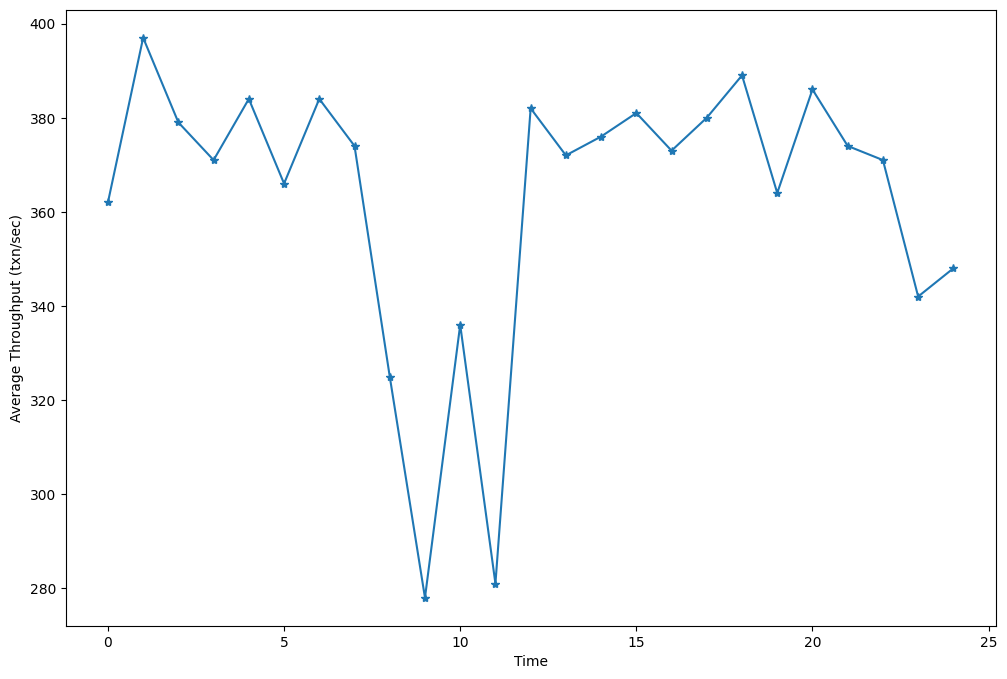

<Figure size 640x480 with 0 Axes>

In [38]:
fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-3],Y[:-3], '-*')
# pl.plot(X[:-1],np.cumsum(Y[:-1])*np.average(Y[:-1])/np.sum(Y[:-1]), '-*')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# pl.ylim(0,1000)
# pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# # pl.plot(X[:-1],Y[:-1], '-*')
# pl.plot(X[:-3],np.cumsum(Y[:-3]), '-*')

# pl.xlabel('Time (sec)')
# pl.ylabel('Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: 3 clusters with remove view change timeout = 4 seconds')

# # pl.ylim(0,1000)
# # pl.savefig('/home/tejas/Desktop/remote_view_change.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

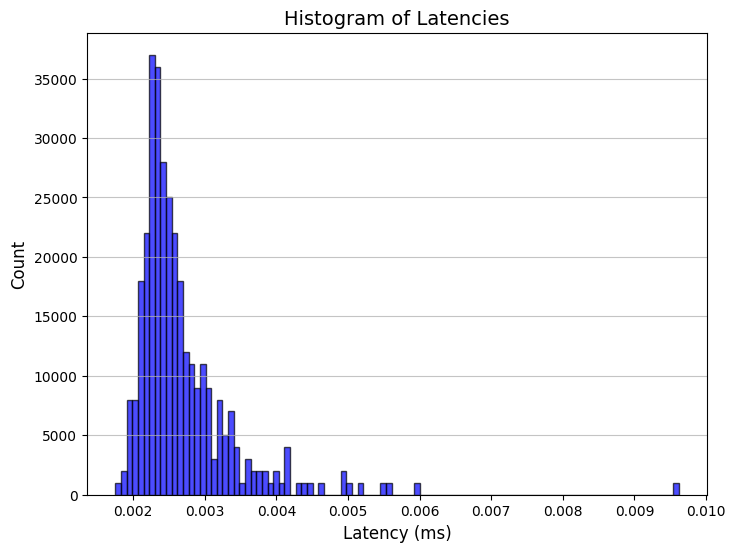

In [39]:
pl.figure(figsize=(8, 6))
pl.hist(1000*lats[::30], bins=100, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
pl.xlabel('Latency (ms)', fontsize=12)
pl.ylabel('Count', fontsize=12)
pl.title('Histogram of Latencies', fontsize=14)
pl.grid(axis='y', alpha=0.75)
pl.show()


In [40]:
np.average(lats)

0.0027008862113788623

echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec0.conf > ../temp/nohup_0.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec1.conf > ../temp/nohup_1.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec2.conf > ../temp/nohup_2.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec3.conf > ../temp/nohup_3.out 2>&1 &
echo 3108 | sudo -S nohup ../../examples/hotstuff-client --idx 0 --iter -1 --max-async 1 > ../temp/nohup_client_4.out 2>&1 &
